# Plotting quantity of observations over time

In [1]:
# required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import openpyxl
import math

# %matplotlib inline
# sns.set()
import datetime as dt
import matplotlib.dates
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter
from  matplotlib import *
# from mpl_toolkits.basemap import Basemap
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import glob
# from matplotlib.backends.backend_pdf import PdfPages

print ('Done')

Done


In [69]:
# get list of stations
stations_file = '~/Documents/GitHub/HMEI-2021/stations.csv'

df_stations = pd.read_csv(stations_file)
df_stations.head()

,Full,Spaced,Key,Key2
0,"Alipur, Delhi - DPCC",Alipur,Alipur,Alipur
1,"Anand Vihar, Delhi - DPCC",Anand Vihar,Anand,AnandVihar
2,"Ashok Vihar, Delhi - DPCC",Ashok Vihar,Ashok,AshokVihar
3,"Aya Nagar, Delhi - IMD",Aya Nagar,Aya,AyaNagar
4,"Bawana, Delhi - DPCC",Bawana,Bawana,Bawana


In [70]:
# refer to stations by preset keys
stations = df_stations['Key2']
stations = [station for station in stations if type(station) == str]
stations = stations[1:]
len(stations)

33

In [61]:
def count_obs(array):
    count = 0
    for elem in array:
        if elem != 'None':
            count += 1
    return count

In [67]:
# load dataframe from file
file_str = '~/Documents/GitHub/HMEI-2021/Delhi_2015-19/Delhi_Alipur.csv'
df = pd.read_csv(file_str)
df.index = pd.to_datetime(df['From Date'])
df = df.drop(columns=['From Date', 'To Date', 'State', 'Station', 'lat', 'lon'])

# transform to monthly
monthly = df.resample('M').apply(count_obs)
obs = monthly.sum(axis=1) # initial series

for station in stations:
    try:
        file_str = '~/Documents/GitHub/HMEI-2021/Delhi_2015-19/Delhi_' + station + '.csv'
        df = pd.read_csv(file_str)
        df.index = pd.to_datetime(df['From Date'])
        df = df.drop(columns=['From Date', 'To Date', 'State', 'Station', 'lat', 'lon'])
        
        monthly = df.resample('M').apply(count_obs)
        series = monthly.sum(axis=1)
        obs += series # add onto total series
    except:
        print(station)

Jahangirpur
JNStadium


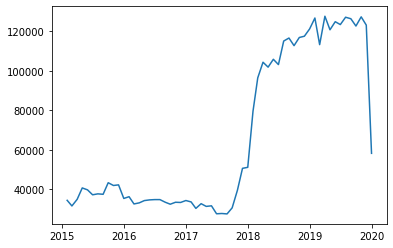

In [72]:
plt.plot(obs)

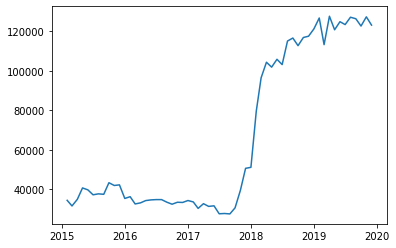

In [68]:
plt.plot(obs[:'2019-11-30'])